In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
cleaned_df = pd.read_csv("clean.csv")
cleaned_df.head()

,Unnamed: 0,Unique ID,Household region,Age of sample adult,Sex of sample adult,Education of sample adult,Hispanic ethnicity of SA,Single + Mult race gps w Hispanic origin,Hispanic origin detail,Single and multiple race groups,...,Medicaid HDHP.1,Medicaid reassignment flag,Paid for by Medicare - plan 1,Paid for by Medicare - plan 2,"Not eligible for Medicaid, CHIP, or other public coverage",SA family poverty ratio,Ratio of family income to poverty threshold for SA’s family,income from wages,income from SSI SSDI,income from retirement
0,0,H056808,3,50,1,1,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,1.93,7,1,2.0,2.0
1,1,H018779,3,53,1,7,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,4.45,12,1,2.0,2.0
2,2,H049265,3,56,1,8,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,5.94,14,1,2.0,2.0
3,3,H007699,3,57,2,5,2,2,3,1,...,NaN,NaN,NaN,NaN,NaN,3.70,11,1,1.0,1.0
4,4,H066034,3,25,1,4,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,1.66,6,8,NaN,NaN


In [3]:
# cleaned_df.columns

In [4]:
demographics = [
    'Unique ID', 
    'Household region', 
    'Age of sample adult', 
    'Sex of sample adult', 
    'Education of sample adult', 
    'Hispanic ethnicity of SA', 
    'Single + Mult race gps w Hispanic origin', 
    'Hispanic origin detail', 
    'Single and multiple race groups', 
    'Ever had Diabetes?',  
    'Weight without shoes (pounds)', 
    'Categorical Body Mass Index']
demographics_df = cleaned_df[demographics]
demographics_df.head(20)

,Unique ID,Household region,Age of sample adult,Sex of sample adult,Education of sample adult,Hispanic ethnicity of SA,Single + Mult race gps w Hispanic origin,Hispanic origin detail,Single and multiple race groups,Ever had Diabetes?,Weight without shoes (pounds),Categorical Body Mass Index
0,H056808,3,50,1,1,2,2,3,1,2,199,3
1,H018779,3,53,1,7,2,3,3,2,1,205,3
2,H049265,3,56,1,8,2,2,3,1,2,160,3
3,H007699,3,57,2,5,2,2,3,1,2,190,4
4,H066034,3,25,1,4,2,3,3,2,2,250,4
5,H037403,3,55,1,5,2,3,3,2,2,200,3
6,H023974,3,45,1,9,2,2,3,1,2,997,9
7,H025636,3,41,1,5,2,3,3,2,2,206,3
8,H018455,3,26,2,4,2,3,3,2,2,996,4
9,H030679,3,71,2,9,2,2,3,1,2,127,2


In [5]:
# Rename Columns
dem_diabetes_df = demographics_df.rename(columns={ 
        'Unique ID': 'ID', 
        'Household region': 'Region', 
        'Age of sample adult': 'Age', 
        'Sex of sample adult': 'Gender', 
        'Education of sample adult': 'Education', 
        'Hispanic ethnicity of SA': 'Hispanic_Origin', 
        'Single + Mult race gps w Hispanic origin': 'Hispanic_Multiracial', 
        'Hispanic origin detail': 'Hispanic Type', 
        'Single and multiple race groups': 'Multiracial', 
        'Ever had Diabetes?': 'Diabetic?',  
        'Weight without shoes (pounds)': 'Weight(lbs)', 
        'Categorical Body Mass Index': 'BMI'})
dem_diabetes_df.head()

,ID,Region,Age,Gender,Education,Hispanic_Origin,Hispanic_Multiracial,Hispanic Type,Multiracial,Diabetic?,Weight(lbs),BMI
0,H056808,3,50,1,1,2,2,3,1,2,199,3
1,H018779,3,53,1,7,2,3,3,2,1,205,3
2,H049265,3,56,1,8,2,2,3,1,2,160,3
3,H007699,3,57,2,5,2,2,3,1,2,190,4
4,H066034,3,25,1,4,2,3,3,2,2,250,4


In [6]:
dem_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29482 entries, 0 to 29481
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    29482 non-null  object
 1   Region                29482 non-null  int64 
 2   Age                   29482 non-null  int64 
 3   Gender                29482 non-null  int64 
 4   Education             29482 non-null  int64 
 5   Hispanic_Origin       29482 non-null  int64 
 6   Hispanic_Multiracial  29482 non-null  int64 
 7   Hispanic Type         29482 non-null  int64 
 8   Multiracial           29482 non-null  int64 
 9   Diabetic?             29482 non-null  int64 
 10  Weight(lbs)           29482 non-null  int64 
 11  BMI                   29482 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 2.7+ MB


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

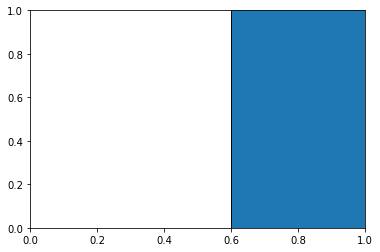

In [7]:
# Due to noticing +900lb weight figures, will create scatter plot to spot weight outliers

weight = dem_diabetes_df['Weight(lbs)']
gender = dem_diabetes_df['Gender']

for i in weight:
    if i > 995:
        weight.replace([i], [None], inplace=True)

plt.bar(gender,
            weight,
            edgecolor="black",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("Weight Outliers")

plt.ylabel("Weight (Lbs)")

plt.xlabel("Gender")

plt.grid(True)

# Show plot.

plt.show()


In [ ]:
plt.scatter(weight, gender, c='r', label='Weight', s=weight)

plt.legend()

plt.xlabel('Gender')

plt.ylabel('Weight')

plt.xlim(0,10)

plt.ylim(0,1000)

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(gender, weight)

In [ ]:
# diabetic = dem_diabetes_df['Diabetic?'].count
diabetic = dem_diabetes_df['Diabetic?'].value_counts()[1]
diabetic

In [ ]:
# fig, ax = plt.subplots()

# ax.scatter(diabetic, weight)

In [ ]:
dem_diabetes_df['Diabetic?'].unique()

In [ ]:
dem_diabetes_df['Weight(lbs)'].unique()

In [ ]:
dem_diabetes_df['Gender'].unique()

In [ ]:
dem_diabetes_df['Age'].unique()

In [ ]:
dem_diabetes_df['Diabetic?'].value_counts()
# 1 = yes
# 2 = no
# 7 = Refused
# 8 = Not Ascertained
# 9 = Don't know

In [ ]:
dem_diabetes_df['Gender'].value_counts()
# 1 = Male
# 2 = Female
# 7 = Refused
# 9 = Don't Know

In [ ]:
dem_diabetes_df['Weight(lbs)'].value_counts()

In [ ]:
dem_diabetes_df['Age'].value_counts()

In [ ]:
dem_diabetes_df['Region'].value_counts()
# 1 = Northeast
# 2 = Midwest
# 3 = South
# 4 = West

In [ ]:
dem_diabetes_df['Education'].value_counts()
# 1 = Grade 1-11
# 2 = 12th Grade, no diploma
# 3 = GED/Equivalent
# 4 = High School Graduate
# 5 = Some College, no degree
# 6 = Associates: occupational, technical, or vocational
# 7 = Associates: academic program
# 8 = Bachelor's degree (Example: BA, AB, BS, BBA)
# 9 = Master's degree (Example: MA, MS, MEng, MEd, MBA)
# 10 = Professional School or Doctoral degree (Example: MD, DDS, DVM, JD,
# PhD, EdD)
# 97 = Refused
# 99 = Don't Know

In [ ]:
dem_diabetes_df['Education'].value_counts().sum()

In [ ]:
dem_diabetes_df['Hispanic_Origin'].value_counts()
# 1 = yes
# 2 = no

In [ ]:
dem_diabetes_df['Hispanic_Multiracial'].value_counts()
# 1 = Hispanic
# 2 = Non-Hispanic White Only
# 3 = Non-Hispanic Black/African American only
# 4 = Non-Hispanic Asian only
# 5 = Non-Hispanic AIAN only
# 6 = Non-Hispanic AIAN and any other group
# 7 = Other single and multiple races

In [ ]:
dem_diabetes_df['Hispanic Type'].value_counts()
# 1 = Hispanic (Mexican/Mexican American)
# 2 = Hispanic (all other groups)
# 3 = Not Hispanic
# 8 = Not Ascertained
# 9 = Don't Know

In [ ]:
dem_diabetes_df['Multiracial'].value_counts()
# 1 = White Only
# 2 = African American Only
# 3 = Asian Only
# 4 = American Indian or Alaskan Native (AIAN) only
# 5 = AIAN and any other group
# 6 = Other single and multiple races
# 7 = Refused
# 8 = Not Ascertained
# 9 = Don't Know

In [ ]:
dem_diabetes_df['BMI'].value_counts()
# 1 = Underweight
# 2 = Healthy Weight
# 3 = Overweight
# 4 = Obese
# 9 = Unknown

In [ ]:
education = dem_diabetes_df['Education']
diabetes = dem_diabetes_df['Diabetic?']

In [ ]:
bmi = dem_diabetes_df['BMI']

bmi = bmi.replace([1, 2, 3, 4, 9], ['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Unknown'], inplace=True)
# dem_diabetes_df.head(50)

In [ ]:
dem_diabetes_df.head()

In [ ]:
education = education.replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 97, 99], 
    ['1-11', 
     '12th, no diploma', 
     'GED/Equiv', 
     'HS Grad', 
     'Some College, no degree',
     'Associates',
     'Associates: academic program',
     'Bachelor',
     'Masters',
     'Terminal Degree',
     'Refused',
     'Unknown'], 
    inplace=True)
dem_diabetes_df.head()

In [ ]:
diabetes = dem_diabetes_df['Diabetic?']
region = dem_diabetes_df['Region']
hisp_origin = dem_diabetes_df['Hispanic_Origin']
hisp_multiracial = dem_diabetes_df['Hispanic_Multiracial']
hisp_type = dem_diabetes_df['Hispanic Type']
multiracial = dem_diabetes_df['Multiracial']
gender = dem_diabetes_df['Gender']

In [ ]:
gender = gender.replace(
    [1, 2, 7, 9], 
    ['Male', 'Female', 'Refused', 'Unknown'], inplace=True)

dem_diabetes_df.head(10)

In [ ]:

hisp_type = hisp_type.replace(
    [1, 2, 3, 8, 9], 
    ['Hisp (Mex/Mex-Amer)', 'Hispanic(other)', 'Not Hispanic', 'Not Ascertained', 'Unknown'], inplace=True)
dem_diabetes_df.head(10)

In [ ]:

diabetes = diabetes.replace(
    [1, 2, 7, 8, 9], 
    ['Yes', 'No', 'Refused', 'Not Ascertained', 'Unknown'], inplace=True)

dem_diabetes_df.head(10)

In [ ]:
multiracial = multiracial.replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9],                                        
    ['White only',                                     
     'African American only',                                    
     'Asian only', 
     'American Indian or Alaskan Native (AIAN) only',                                 
     'AIAN and any other group',
     'Other single and Multiracial',
     'Refused',
     'Not Ascertained',
     'Unknown'], inplace=True)

dem_diabetes_df.head(10)

In [ ]:

hisp_multiracial = hisp_multiracial.replace(
    [1, 2, 3, 4, 5, 6, 7],                                
    ['Hisp',             
     'Non-Hispanic White only',   
     'Non-Hispanic African American only',              
     'Non-Hispanic Asian only',               
     'Non-Hispanic AIAN only',     
     'Non-Hispanic AIAN and other group',                                        
     'Other single and Multiracial'], inplace=True)

dem_diabetes_df.head(10)

In [ ]:

hisp_origin = hisp_origin.replace(
    [1, 2], 
    ['Yes', 'No'], inplace=True)

dem_diabetes_df.head(10)

In [ ]:

region = region.replace(
    [1, 2, 3, 4], 
    ['Northeast', 'Midwest', 'South', 'West'], inplace=True)

dem_diabetes_df.head(10)

In [ ]:
# for i in weight:
#     if i > 995:
#         weight.replace([i], [''], inplace=True)

# dem_diabetes_df.head(10)

In [ ]:
dem_diabetes_df.info()

In [ ]:
# Export the df into a csv

# dem_diabetes_df.to_csv("demographics.csv", index=False)

In [ ]:
diabetic_df = dem_diabetes_df.loc[dem_diabetes_df['Diabetic?'] == 'Yes']

# diabetic_df = diabetic_df.reset_index(drop=True)
diabetic_df.head(10)

In [ ]:
# diabetic_df.to_csv("diabetic_demographics.csv", index_label=False)

In [ ]:
diabetic_json = diabetic_df.to_json(orient='records')

json_data = json.loads(diabetic_json)

json_formatted = json.dumps(json_data, indent=2)

print(json_formatted)

In [ ]:
diabetic_df.to_json(r'samples.json', orient='records')